# Simulation impot concubains

In [1]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2019-04-26 17:48:09.934000


In [2]:
year = 2014

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import importlib
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import sys

In [6]:
import sys
sys.path.append("./income_tax_function")


In [7]:
if year == 2014:
    ir = importlib.import_module("IRPP_from_scratch")
else :
    ir = importlib.import_module("IRPP_from_scratch_{}".format(year))

In [8]:
store_path = '../Data/hdf/edp_2015_final.h5'
Store = pd.HDFStore(store_path)

In [9]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [10]:
df_fiscr = load_fisc_r_by_year(year)

In [11]:
print df_fiscr.AN_FISC.iloc[0]

2015


## Test contre simulateur DgFip

In [12]:
salcho_imp = ir.salcho_imp(pd.Series([103456, 103456, 74000]))
parts_fiscales_enfants = ir.parts_fiscales_enfants((pd.Series([4,0,0])))

In [13]:
salcho_imp

0    93110
1    93110
2    66600
dtype: float64

In [14]:
ir.ir_avec_qf(salcho_imp, parts_fiscales_enfants)

0     7609.00
1    24643.32
2    14341.16
dtype: float64

In [15]:
ir.ir_avec_plafond_qf_enfant(salcho_imp, parts_fiscales_enfant=parts_fiscales_enfants)

0    15583.32
1    24643.32
2    14341.16
dtype: float64

decote

In [16]:
np.maximum(0,ir.ir_avec_plafond_qf_enfant(salcho_imp, parts_fiscales_enfant=parts_fiscales_enfants) - 
           ir.decote_ir(salcho_imp,parts_fiscales_enfants))

0    15583.32
1    24643.32
2    14341.16
dtype: float64

In [17]:
salaire =  ir.salcho_imp(pd.Series([17000]))
ir.ppe(16000,4 ) 

424.043

In [18]:
np.array(range(2000))

array([   0,    1,    2, ..., 1997, 1998, 1999])

# Match avec les déclarations fiscales individuelles.

In [19]:
path = (u"./Pickle/final_select_rev_{}.p".format(year))

In [20]:
import pickle
select_id_fisc_log = pickle.load(
            open(path, 'rb'))

In [21]:
df_fisci = load_fisc_i_by_year(year)
df_fisci_select =  df_fisci[df_fisci.ID_FISC_LOG_DIFF.isin(select_id_fisc_log)]

In [22]:
df_fisci_select['SEXE'] = df_fisci_select.SEXE.fillna(0).astype('int')

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
df_fisci_select.groupby('ID_FISC_LOG_DIFF')['ID_FISC_FOY_DIFF'].nunique().value_counts()

2    175693
dtype: int64

In [24]:
del df_fisci

In [25]:
select = df_fisci_select.ID_FISC_FOY_DIFF

In [26]:
df_revdet =  pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year)) 
df_revdet_select = df_revdet[df_revdet.ID_FISC_FOY_DIFF.isin(select)]
df_revdet_select['TYPE_FISC'] = df_revdet_select.TYPE_FISC.astype('str')
df_revdet_select = df_revdet_select.merge(df_fisci_select, on = [
        'ID_FISC_FOY_DIFF','ORDREFIP', 'TYPE_FISC'], how='right').sort('ID_FISC_LOG_DIFF')

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
columns = [u'AN_FISC_x', u'ID_FISC_FOY_DIFF', u'ID_FISC_LOG_DIFF', u'ORDREFIP', u'TYPE_FISC',
       u'REV_PRINC', u'YSALI', u'YCHOI', u'YRSTI', u'YALRI', u'YRAGI',
       u'YBICI', u'YBNCI', u'ID_DIFF', u'AN_FISC_y',
       u'SEXE', u'JNAIS', u'MNAIS', u'ANAIS', u'CODNAIS', u'CIDECI', u'ZOXYZD',
       u'DACOED', u'ZOXYZP', u'DACOEP', u'T_CHARGE', u'CNCOIPV', u'CSDEP',
       u'CNE1', u'COM_NSCAT', u'COM_SCAT1', u'COM_SCAT2', u'I_FISC_LOGEMENT',
       u'I_FISC_REVENU', u'TYPE_DECL', u'TYPE_PRES', u'POIDS_FIDELI']

In [28]:
df_revdet_select = df_revdet_select.sort(['ID_FISC_LOG_DIFF', 'ID_FISC_FOY_DIFF'])[columns]

In [29]:
rev_sal = df_revdet_select[['YSALI','YCHOI']].sum(axis = 1)

In [30]:
salcho_imp = ir.salcho_imp(rev_sal)
#TODO : tester lequel des deux marche le mieux
# rev_sal = df_fisci_revdet[['YSALI','YCHOI']].sum(axis = 1)

In [31]:
rpns_var = df_revdet_select[['YRAGI','YBICI','YBNCI']].sum(axis = 1) #rpns-->rev_act_nonsal-->rev_actdf_revdet_select

YRAGI agricol Revenus 
YBICI industriels et commerciaux individuels
YBNCI Revenus non commerciaux individuels

In [32]:
rev_pen_var = df_revdet_select[['YRSTI','YALRI']].sum(axis = 1)

In [33]:
print (df_revdet_select.YALRI>20).value_counts()
print (df_revdet_select.YRSTI>20).value_counts()

False    688083
True      11608
dtype: int64
False    694193
True       5498
dtype: int64


In [34]:
rev_cat = salcho_imp + rpns_var + rev_pen_var
#TODO : chack car fait à l'arrache.

In [35]:
rbg = rev_cat #ne prends pas en compte (nbic_impm_holder) + nacc_pvce  - deficit_ante
rni = rbg # prends pas en compte les abat_spe

In [36]:
df_fisci_revdet= df_revdet_select

In [37]:
df_fisci_revdet["Age"] = year - df_fisci_revdet.ANAIS

In [38]:
df_fisci_revdet["Reduction_impot_pour_etudes"] = (
    ((df_fisci_revdet.Age >10)& (df_fisci_revdet.Age <=14)) *61 +
  ( (df_fisci_revdet.Age >14)& (df_fisci_revdet.Age <=18)) *153 
  # + ( (df_fisci_revdet.Age >18)& (df_fisci_revdet.Age <=25)) *183
).astype('float')

### Crée une variable avec l'age de tout les enfants à la suite

In [39]:
groupie = df_fisci_revdet.groupby('ID_FISC_LOG_DIFF')

In [40]:
groupie.nth(1).Age.iloc[0]

16.0

In [41]:
#df_fisci_revdet.head()

In [42]:
df_fisci_revdet["Rni"] = rni

In [43]:
grpby = df_fisci_revdet.groupby('ID_FISC_FOY_DIFF')

In [44]:
grpby_fisci_count = grpby.count()


In [45]:
grpby_fisci_sum = grpby.sum()

In [46]:
grpby_fisci_first = df_fisci_revdet[df_fisci_revdet.TYPE_FISC == "1"].groupby('ID_FISC_FOY_DIFF').first()

In [47]:
#grpby_fisci_first.head(15)

In [48]:
#merge = pd.merge(grpby_fisci.reset_index(), df_fisci_bio, on = 'ID_FISC_FOY_DIFF')

In [49]:
nb_individu_foyer = grpby_fisci_count['AN_FISC_y']
nb_enfant = nb_individu_foyer - 1
grpby_fisci_first['Nb_enfants'] = nb_enfant

In [50]:
parts_fiscales_enfants = ir.parts_fiscales_enfants(nb_enfant)
grpby_fisci_first['Parts_fiscales_enfants'] = parts_fiscales_enfants


In [51]:
grpby_fisci_sum.Rni.shape

(351386L,)

In [52]:
grpby_fisci_first.reset_index()[["Parts_fiscales_enfants", 'Nb_enfants']].head()

,Parts_fiscales_enfants,Nb_enfants
0,0.5,1
1,1.0,2
2,0.5,1
3,0.0,0
4,0.5,1


In [53]:
grpby_fisci_first['Irpp_ss_qf'] = ir.ir_sans_qf(grpby_fisci_sum.Rni)
grpby_fisci_first['Irpp_ac_qf'] = ir.ir_avec_qf(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_ac_plaf_qf'] = ir.ir_avec_plafond_qf_enfant(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Ppe'] = ir.ppe(grpby_fisci_sum.YSALI, grpby_fisci_first.Nb_enfants)


In [54]:

grpby_fisci_first['Decote'] = ir.decote_ir(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_decote'] =  np.maximum(0, grpby_fisci_first['Irpp_ac_plaf_qf'] -grpby_fisci_first['Decote'] )
grpby_fisci_first['Irpp_seuil_prelevement'] = ((grpby_fisci_first['Irpp_decote']<=62)*0 +
                                               (grpby_fisci_first['Irpp_decote']>62)*grpby_fisci_first['Irpp_decote'])


In [55]:
grpby_fisci_first["Reduction_impot_pour_etudes"] = grpby_fisci_sum.Reduction_impot_pour_etudes

In [56]:
grpby_fisci_first['Irpp_reduction_impot_etudes'] = np.maximum(0, grpby_fisci_first['Irpp_decote'] - grpby_fisci_sum.Reduction_impot_pour_etudes)
grpby_fisci_first['Irpp_reduction_impot_etudes_seuil'] = ((grpby_fisci_first['Irpp_reduction_impot_etudes']<=62)*0 +
                                               (grpby_fisci_first['Irpp_reduction_impot_etudes']>62)*grpby_fisci_first['Irpp_reduction_impot_etudes'])

In [57]:
#grpby_fisci_first[['Irpp_reduction_impot_etudes', 'Irpp_decote',"Reduction_impot_pour_etudes" ]].head()

In [58]:
#grpby_fisci_first[['Irpp_reduction_impot_etudes', 'Irpp_decote',"Reduction_impot_pour_etudes" ]].head()

In [59]:
grpby_fisci_first["Rni_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].Rni
grpby_fisci_first["Rni_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].Rni

grpby_fisci_first["Salaire_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].YSALI
grpby_fisci_first["Salaire_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].YSALI

grpby_fisci_first["Irpp_decote_pere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 1].Irpp_decote
grpby_fisci_first["Irpp_decote_mere"] = grpby_fisci_first[grpby_fisci_first.SEXE == 2].Irpp_decote
grpby_fisci_first.loc[grpby_fisci_first['SEXE'] == 1, 'Allocation_pere'] = grpby_fisci_first.Nb_enfants
grpby_fisci_first.loc[grpby_fisci_first['SEXE'] == 2, 'Allocation_mere'] = grpby_fisci_first.Nb_enfants
grpby_fisci_first["Age_pere"] = year - grpby_fisci_first[grpby_fisci_first.SEXE == 1].ANAIS
grpby_fisci_first["Age_mere"] = year - grpby_fisci_first[grpby_fisci_first.SEXE == 2].ANAIS

In [60]:
grpby_fisci_first.Salaire_pere.value_counts(dropna=False).head(4)

NaN       175968
 0         22106
 18000       114
 24000       114
dtype: int64

In [61]:
grpby_fisci_first["Not_touched_by_decote"] = grpby_fisci_first.Irpp_decote == grpby_fisci_first.Irpp_ac_plaf_qf

### Travail sur petit sample dans un premier temps

In [62]:
irpp_by_log_diff = grpby_fisci_first.groupby('ID_FISC_LOG_DIFF').sum().reset_index()

In [63]:
#df = df_fiscr.merge(irpp_by_log_diff, on='ID_FISC_LOG_DIFF')
#df_right = df_fiscr.merge(irpp_by_log_diff, on='ID_FISC_LOG_DIFF', how = 'outer')

In [64]:
small_sample_ripp_fisci = grpby_fisci_first.sort('ID_FISC_LOG_DIFF')
small_sample_ripp_fisci = small_sample_ripp_fisci#.iloc[:1000].reset_index()

In [65]:
small_sample_ripp_fisci.shape

(351386, 61)

In [66]:
#small_sample_ripp_fisci.head()

In [67]:
small_sample_ripp_fiscr = df_fiscr.sort('ID_FISC_LOG_DIFF')#.iloc[0:5000]

In [68]:
%%time
small_merge=pd.merge(small_sample_ripp_fisci.reset_index(), small_sample_ripp_fiscr, on = 'ID_FISC_LOG_DIFF')

Wall time: 33 s


In [69]:
small_merge.shape

(351386, 161)

In [70]:
small_merge.groupby('ID_FISC_LOG_DIFF').sum().Nb_enfants.head()

ID_FISC_LOG_DIFF
87     2
96     3
97     2
107    2
126    4
Name: Nb_enfants, dtype: int64

Pour chaque logement ayant N enfants on a N+1 allocations possible.

### Touché par la décote

In [71]:
small_sample_ripp_fisci.loc[small_sample_ripp_fisci.ID_FISC_LOG_DIFF == 216,'Nb_enfants'] = pd.Series([0,1]).values

In [72]:
#small_sample_ripp_fisci[small_sample_ripp_fisci.ID_FISC_LOG_DIFF == 216]

Stratégie : On trie par ID_FISC_LOG puis par ID_FOY. ON sépare en fonction du nombre d'enfants pour faire plusieurs moulinettes.
Il y a N+1 allocations possibles.

On veut se retrouver avec une df_fisci qui fait impot8allocation_1, impot_allocation_2,..., impot_allocation_n

Si 1 enfant on fait d'abord l'impot avec toute les parts sur le premier parent, puis sur le deuxième.


#### On isole les 1 enfants

In [73]:
grpby = small_merge.groupby('ID_FISC_LOG_DIFF').sum()
grpby_1_enfant = grpby[grpby.Nb_enfants == 1]
grpby_2_enfant = grpby[grpby.Nb_enfants == 2]
grpby_3_enfant = grpby[grpby.Nb_enfants == 3]
grpby_4_enfant = grpby[grpby.Nb_enfants == 4]
grpby_5_enfant = grpby[grpby.Nb_enfants == 5]
grpby_6_enfant = grpby[grpby.Nb_enfants == 6]
grpby_7_enfant = grpby[grpby.Nb_enfants == 7]
grpby_8_enfant = grpby[grpby.Nb_enfants == 8]



In [74]:
grpby.Nb_enfants.value_counts()

2     75502
1     62300
3     23985
4      9217
5      2301
6      1546
8       280
7       244
0       173
10       60
9        53
12       18
11       13
13        1
dtype: int64

In [75]:
#
grpby_dict= dict()
for nb_enf in range(1,9):
    grpby_dict["{}_child".format(nb_enf)] = grpby[grpby.Nb_enfants == nb_enf].reset_index()

In [76]:
#
df_fisci_dict = dict()
for nb_enf in range(1,9):
    small_sample_ripp_fisci["nb_enfant_total"] = nb_enf
    temp = small_sample_ripp_fisci[small_sample_ripp_fisci.ID_FISC_LOG_DIFF.isin( grpby_dict["{}_child".format(nb_enf)].ID_FISC_LOG_DIFF)]
    df_fisci_dict["{}_child".format(nb_enf)] = temp.reset_index().sort(['ID_FISC_LOG_DIFF','ID_FISC_FOY_DIFF'])

In [77]:
for nb_enf in range(1,9): #Teste qu'on a bien toujours que 2 observations dans chaque logement fiscal
    assert  np.all(df_fisci_dict["{}_child".format(1)].groupby("ID_FISC_LOG_DIFF")["ID_FISC_FOY_DIFF"].nunique())

In [78]:
for nb_enf in range(1,9): #Teste qu'on a bien toujours que 2 observations dans chaque logement fiscal
      print df_fisci_dict["{}_child".format(nb_enf)].groupby("ID_FISC_LOG_DIFF")["AN_FISC_x"].count().value_counts()

2    62300
dtype: int64
2    75502
dtype: int64
2    23985
dtype: int64
2    9217
dtype: int64
2    2301
dtype: int64
2    1546
dtype: int64
2    244
dtype: int64
2    280
dtype: int64


Sort par le sexe pour que allocation 1 corresponde bien au père qui prend un enfant, et alloc 2 la mere, etc

In [79]:
for nb_enf in range(1,9):
      df_fisci_dict["{}_child".format(nb_enf)] = df_fisci_dict["{}_child".format(nb_enf)].sort(["ID_FISC_LOG_DIFF","SEXE"])

In [80]:
#
for nb_enf1 in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf1)]
    nb_enfant_total= nb_enf1
    for nb_enf2 in range(nb_enfant_total+1):
        df_temp["Nb_enf_allocation_{}".format(nb_enf2+1)] = int(len(df_temp)/2)*[nb_enf2, nb_enfant_total - nb_enf2] 
    df_fisci_dict["{}_child".format(nb_enf)] = df_temp


In [81]:
#### Calcul de l'impot

In [82]:
grpby_fisci_first['Ppe'] = ir.ppe(grpby_fisci_sum.YSALI, grpby_fisci_first.Nb_enfants)
grpby_fisci_first['Decote'] = ir.decote_ir(grpby_fisci_sum.Rni, parts_fiscales_enfants)
grpby_fisci_first['Irpp_decote'] =  np.maximum(0, grpby_fisci_first['Irpp_ac_plaf_qf'] -grpby_fisci_first['Decote'] )
grpby_fisci_first['Irpp_seuil_prelevement'] = ((grpby_fisci_first['Irpp_decote']<=62)*0 +
                                               (grpby_fisci_first['Irpp_decote']>62)*grpby_fisci_first['Irpp_decote'])
grpby_fisci_first["Reduction_impot_pour_etudes"] = grpby_fisci_sum.Reduction_impot_pour_etudes
grpby_fisci_first['Irpp_reduction_impot_etudes'] = np.maximum(0, grpby_fisci_first['Irpp_decote'] - grpby_fisci_sum.Reduction_impot_pour_etudes)
grpby_fisci_first['Irpp_reduction_impot_etudes_seuil'] = ((grpby_fisci_first['Irpp_reduction_impot_etudes']<=62)*0 +
                         
                                                          (grpby_fisci_first['Irpp_reduction_impot_etudes']>62)*grpby_fisci_first['Irpp_reduction_impot_etudes'])

In [83]:
#grpby_fisci_first.sort("ID_FISC_LOG_DIFF").head(10)

In [84]:
from scipy import special

In [85]:
## More kind of taxes
for nb_enf in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf)]
    
    for alloc_number in range(1,nb_enf+2): # Il y a nb_enf+1 allocations possibles     
        
        ## Decote
        parts_fiscales_enfants = pd.Series(ir.parts_fiscales_enfants(df_temp['Nb_enf_allocation_{}'.format(alloc_number)]))
        decote = ir.decote_ir(df_temp.Rni, parts_fiscales_enfants)
        irpp_ac_plaf_qf = ir.ir_avec_plafond_qf_enfant(df_temp.Rni, parts_fiscales_enfants)
        df_temp['Irpp_decote_allocation_{}'.format(alloc_number)] =  np.maximum(0, irpp_ac_plaf_qf -decote )
        
        ## Seuil prelevement
        
        df_temp['Irpp_decote_seuil_prel_allocation_{}'.format(alloc_number)] =  ((irpp_ac_plaf_qf<=62)*0 +
                                               (irpp_ac_plaf_qf>62)*irpp_ac_plaf_qf)
        
        ##
        

        
        
        
        
        
        
        
        
        df_fisci_dict["{}_child".format(nb_enf)] = df_temp

In [86]:
#df_fisci_dict["{}_child".format(nb_enf)].head()

In [87]:
# Simple

for nb_enf in range(1,9):
    df_temp = df_fisci_dict["{}_child".format(nb_enf)]
    
    for alloc_number in range(1,nb_enf+2): # Il y a nb_enf+1 allocations possibles     
        parts_fiscales_enfants = pd.Series(ir.parts_fiscales_enfants(df_temp['Nb_enf_allocation_{}'.format(alloc_number)]))
        decote = ir.decote_ir(df_temp.Rni, parts_fiscales_enfants)
        irpp_ac_plaf_qf = ir.ir_avec_plafond_qf_enfant(df_temp.Rni, parts_fiscales_enfants)
        df_temp['Irpp_decote_allocation_{}'.format(alloc_number)] =  np.maximum(0, irpp_ac_plaf_qf -decote )
        df_fisci_dict["{}_child".format(nb_enf)] = df_temp

In [88]:
#df_fisci_dict["{}_child".format(2)][['ID_FISC_LOG_DIFF']+['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,4)]+['Irpp_decote']].head()

In [89]:
#df_fisci_dict["{}_child".format(2)][['ID_FISC_LOG_DIFF']+['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,4)]+['Irpp_decote']].head()

In [90]:
select_var= ['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf + 2)]+['Irpp_decote']\
            +["ZIMPOM"]

In [91]:
result_dict = dict()
for nb_enf in range(1,9):
    result_dict["{}_child".format(nb_enf)] = df_fisci_dict["{}_child".format(nb_enf)
                                                          ].groupby('ID_FISC_LOG_DIFF').sum()

In [92]:
#result_dict["{}_child".format(1)].head()

In [93]:
for nb_enf in range(1,9):
    result = result_dict["{}_child".format(nb_enf)]
    result["result_min_allocation"] = result[['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf+2)]].min(axis = 1)
    result["result_max_allocation"] = result[['Irpp_decote_allocation_{}'.format(aloc) for aloc in range(1,nb_enf+2)]].max(axis = 1)
    result["Gain_fiscal_max"] = result["result_max_allocation"] - result["result_min_allocation"]

    result["Fiscal_loss"] =  result["Irpp_decote"] -result["result_min_allocation"]
    result_dict["{}_child".format(nb_enf)] = result

In [94]:
(result.result_min_allocation == result.result_max_allocation).value_counts()

False    142
True     102
dtype: int64

In [95]:
#for nb_enf in range(1,9):
#    result = result_dict["{}_child".format(nb_enf)]
#    print 'nb_child: ', nb_enf, '\n', (result.result_min_allocation == result.result_max_allocation).value_counts()

In [96]:
# #
# for nb_enf in range(1,9):
#     result = result_dict["{}_child".format(nb_enf)]
#     print 'nb_child: ', nb_enf, '\n', (result.result_min_allocation == result.Irpp_decote).value_counts()
#     print (result.result_min_allocation == result.Irpp_decote).value_counts(normalize = True)

On concatène les tables avant de merger à fiscr (pour avoir ZIMPOM).

In [97]:
frames = result_dict
df = pd.concat(result_dict)

In [98]:
#df.head()

In [99]:
print (df.result_min_allocation == df.Irpp_decote).value_counts()
print (df.result_max_allocation == df.result_min_allocation).value_counts()

True     130706
False     44633
dtype: int64
False    144265
True      31074
dtype: int64


In [100]:
print (df.result_min_allocation == df.Irpp_decote).value_counts(normalize = True)
print (df.result_max_allocation == df.result_min_allocation).value_counts(normalize = True)

True     0.745447
False    0.254553
dtype: float64
False    0.822778
True     0.177222
dtype: float64


In [101]:
df["Gain_fiscal_max_1"] = ((df.Gain_fiscal_max>0)&(df.Gain_fiscal_max<= 1)).astype('int')
df["Gain_fiscal_max_50"] = ((df.Gain_fiscal_max>1)&(df.Gain_fiscal_max<= 50)).astype('int')
df["Gain_fiscal_max_100"] = ((df.Gain_fiscal_max> 50)&(df.Gain_fiscal_max <= 100)).astype('int')
df["Gain_fiscal_max_200"] = ((df.Gain_fiscal_max> 100)&(df.Gain_fiscal_max <= 200)).astype('int')

df["Gain_fiscal_max_300"] = ((df.Gain_fiscal_max> 200)&(df.Gain_fiscal_max <= 300)).astype('int')
df["Gain_fiscal_max_over_300"] = ((df.Gain_fiscal_max > 300)).astype('int')

In [102]:
#pd.crosstab()

In [103]:
df["Do_not_optimize"] = (df.result_min_allocation != df.Irpp_decote)

In [104]:
df["Do_not_optimize_5_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>5
df["Do_not_optimize_10_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>10
df["Do_not_optimize_20_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>20
df["Do_not_optimize_50_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>50
df["Do_not_optimize_100_euros"] = np.abs(df.result_min_allocation - df.Irpp_decote)>100

In [105]:
optimize_path = (u"./pickle/optimize/Do_not_optimize_rev_{}.p".format(year))

In [106]:
pickle.dump(df[df.Do_not_optimize_5_euros].reset_index().ID_FISC_LOG_DIFF, 
            open(optimize_path, 'wb'))

In [107]:
print df.Do_not_optimize.value_counts(normalize=True)
print df.Do_not_optimize_5_euros.value_counts(normalize=True)
print df.Do_not_optimize_10_euros.value_counts(normalize=True)
print df.Do_not_optimize_20_euros.value_counts(normalize=True)
print df.Do_not_optimize_50_euros.value_counts(normalize=True)
print df.Do_not_optimize_100_euros.value_counts(normalize=True)

False    0.745447
True     0.254553
dtype: float64
False    0.748852
True     0.251148
dtype: float64
False    0.750552
True     0.249448
dtype: float64
False    0.753922
True     0.246078
dtype: float64
False    0.764103
True     0.235897
dtype: float64
False    0.779912
True     0.220088
dtype: float64


#### Biologic

In [108]:
path = (u"./Pickle/biologic/")
biologic = pickle.load(open(path+"biologic_households2013.p", 'rb'))

In [109]:
df2 = df.reset_index()
df2 = df2[df2.ID_FISC_LOG_DIFF.isin(biologic)]

In [110]:
print df2.Do_not_optimize.value_counts(normalize=True)
print df2.Do_not_optimize_5_euros.value_counts(normalize=True)
print df2.Do_not_optimize_10_euros.value_counts(normalize=True)
print df2.Do_not_optimize_20_euros.value_counts(normalize=True)
print df2.Do_not_optimize_50_euros.value_counts(normalize=True)
print df2.Do_not_optimize_100_euros.value_counts(normalize=True)

False    0.769703
True     0.230297
dtype: float64
False    0.773902
True     0.226098
dtype: float64
False    0.775509
True     0.224491
dtype: float64
False    0.779655
True     0.220345
dtype: float64
False    0.791085
True     0.208915
dtype: float64
False    0.808915
True     0.191085
dtype: float64


In [111]:
from scipy import stats

In [112]:
stats.ttest_ind(df.Do_not_optimize, df2.Do_not_optimize)

Ttest_indResult(statistic=9.9616370829997614, pvalue=2.2698597375814821e-23)

In [113]:
df["Do_not_optimize_0_1_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.001
df["Do_not_optimize_0_5_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.005
df["Do_not_optimize_1_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.01
df["Do_not_optimize_2_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.02
df["Do_not_optimize_5_prct_income_share"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Rni)>0.05

In [114]:
print df.Do_not_optimize_0_1_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_0_5_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_1_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_2_prct_income_share.value_counts(normalize = True)
print df.Do_not_optimize_5_prct_income_share.value_counts(normalize = True)

False    0.761126
True     0.238874
dtype: float64
False    0.809968
True     0.190032
dtype: float64
False    0.862096
True     0.137904
dtype: float64
False    0.921039
True     0.078961
dtype: float64
False    0.988645
True     0.011355
dtype: float64


In [115]:
df["Do_not_optimize_95_prct_tax_amount"] =  ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.95
df["Do_not_optimize_90_prct_tax_amount"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Irpp_decote)>0.9
df["Do_not_optimize_50_prct_tax_amount"] =  ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.50
df["Do_not_optimize_5_prct_tax_amount"] = ((df.Irpp_decote - df.result_min_allocation)/df.Irpp_decote)>0.05

In [116]:
df["Optimize_10_prct_tax_amount"] =  (np.abs(df.result_min_allocation - df.Irpp_decote)/df.Irpp_decote)<0.9

In [117]:
(df.result_min_allocation<=(df.Irpp_decote)).value_counts(normalize = True)

True    1
dtype: float64

In [118]:
df.Do_not_optimize_90_prct_tax_amount.value_counts(normalize = True)

False    0.924968
True     0.075032
dtype: float64

In [119]:
df.Optimize_10_prct_tax_amount.value_counts(normalize = True)

True     0.509641
False    0.490359
dtype: float64

In [120]:
#df[["Do_not_optimize_90_prct_tax_amount","Optimize_10_prct_tax_amount", "Irpp_decote", "result_min_allocation" ]]

In [121]:
(np.abs(df.result_min_allocation - df.Irpp_decote)/df.Irpp_decote).head()

         ID_FISC_LOG_DIFF
1_child  153                 0.000000
         210                 0.000000
         216                 0.212582
         228                      NaN
         233                      NaN
dtype: float64

In [122]:
hdf_path = ("./Generated_hdf/optimizers.h5")

In [123]:
df.to_hdf(hdf_path, "optimizers_{}".format(year))

In [124]:
year

2014

In [125]:
import datetime

In [126]:
print datetime.datetime.now()

2019-04-26 17:50:17.981000


In [127]:
df.reset_index(inplace = True)

In [128]:
keep_id_fisc_log_diff = df.ID_FISC_LOG_DIFF

In [129]:
df_fiscr = load_fisc_r_by_year(year)
df_fiscr = df_fiscr[df_fiscr.ID_FISC_LOG_DIFF.isin(keep_id_fisc_log_diff)][['ID_FISC_LOG_DIFF', "ZIMPOM", "ZIMPOM14"]]

In [130]:
df_scatter = pd.merge(df, df_fiscr, on = "ID_FISC_LOG_DIFF")

(0, 1500)

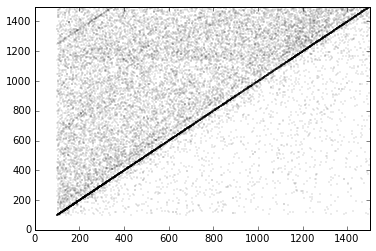

In [131]:
df_scatter = df_scatter.query("(ZIMPOM14>100) & (Irpp_decote>100)")
plt.scatter(df_scatter.ZIMPOM14, df_scatter.Irpp_decote,  s = 0.01)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0, 1500)

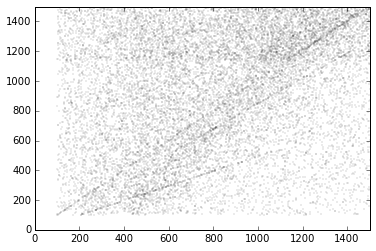

In [132]:
df_scatter = df_scatter.query("(ZIMPOM>100) & (Irpp_decote>100)")
plt.scatter(df_scatter.ZIMPOM, df_scatter.Irpp_decote,  s = 0.01)
plt.xlim((0,1500))
plt.ylim((0,1500))

(0.9, 1.1)

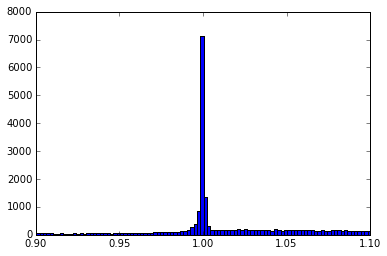

In [133]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM14
ratio  = ratio[ratio<2]
plt.hist(ratio, bins = 1000)
plt.xlim(0.9, 1.1)

In [134]:
(df_scatter.ZIMPOM14>100).value_counts()

True    66990
dtype: int64

(0.98, 1.02)

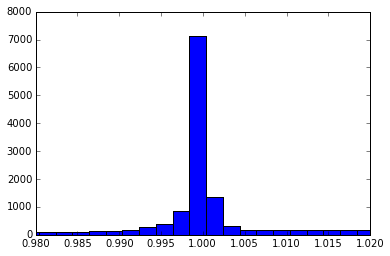

In [135]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM14
ratio  = ratio[ratio<2]
plt.hist(ratio, bins = 1000)
plt.xlim(0.98, 1.02)

In [136]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(year))
biologic = pickle.load( 
        open(biologic_path, 'rb'))

In [137]:
df_scatter = df_scatter[df_scatter.ID_FISC_LOG_DIFF.isin(biologic)]


(0.98, 1.02)

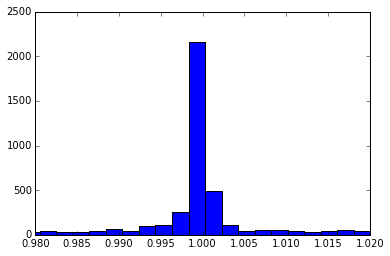

In [138]:
ratio = df_scatter.Irpp_decote/df_scatter.ZIMPOM14
ratio  = ratio[ratio<2]
plt.hist(ratio.values, bins = 1000)
plt.xlim(0.98, 1.02)

In [139]:
df_scatter.shape

(20876, 111)

In [140]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)
stop_time = start_time
#clear  memory
%reset -f 

('now: ', datetime.datetime(2019, 4, 26, 17, 50, 30, 891000))
('execution_time: ', datetime.timedelta(0, 140, 957000))
